In [1]:
import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
from scipy import sparse

In [2]:
sc.settings.verbosity = 3  
# verbosity: errors (0), warnings (1), info (2), hints (3)
# sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(5, 5))

In [3]:
samples_dict = {"CTR": "CTR", "AAV": "AAV"}

In [4]:
adata_dict = dict()
for sample in samples_dict.keys():
        adata_dict[sample]= sc.read_h5ad("./Integrate/adata_"+ sample + "_with_image_processed.h5ad")
        adata_dict[sample].obs["annotation"]= sc.read_h5ad("./Integrate/adata_"+ sample + "_napari.h5ad").obs["annotation"]
        print(adata_dict[sample].obs.shape)

(152894, 16)
(150517, 16)


In [5]:
granulosa_combined = adata_dict[list(samples_dict.keys())[0]].raw.to_adata().concatenate([adata_dict[x].raw.to_adata() for x in list(samples_dict.keys())[1:]], batch_categories=list(samples_dict.keys()))
# granulosa_combined.obs_names = [x.split("-")[0] + "-" + x.split("-")[1] for x in granulosa_combined.obs_names]
granulosa_combined.obs_names

C:\Users\zyy\AppData\Local\Temp\ipykernel_360\2137026787.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  granulosa_combined = adata_dict[list(samples_dict.keys())[0]].raw.to_adata().concatenate([adata_dict[x].raw.to_adata() for x in list(samples_dict.keys())[1:]], batch_categories=list(samples_dict.keys()))


Index(['s_008um_00301_00321-1-CTR', 's_008um_00593_00642-1-CTR',
       's_008um_00630_00352-1-CTR', 's_008um_00598_00455-1-CTR',
       's_008um_00336_00497-1-CTR', 's_008um_00275_00289-1-CTR',
       's_008um_00265_00607-1-CTR', 's_008um_00605_00343-1-CTR',
       's_008um_00284_00196-1-CTR', 's_008um_00521_00423-1-CTR',
       ...
       's_008um_00238_00438-1-AAV', 's_008um_00631_00323-1-AAV',
       's_008um_00197_00639-1-AAV', 's_008um_00536_00521-1-AAV',
       's_008um_00548_00323-1-AAV', 's_008um_00252_00421-1-AAV',
       's_008um_00565_00244-1-AAV', 's_008um_00309_00193-1-AAV',
       's_008um_00373_00222-1-AAV', 's_008um_00456_00755-1-AAV'],
      dtype='object', length=303411)

In [6]:
granulosa_combined.write_h5ad("Integrate/follicle_annotation.h5ad")

CTR : (152894, 3000)


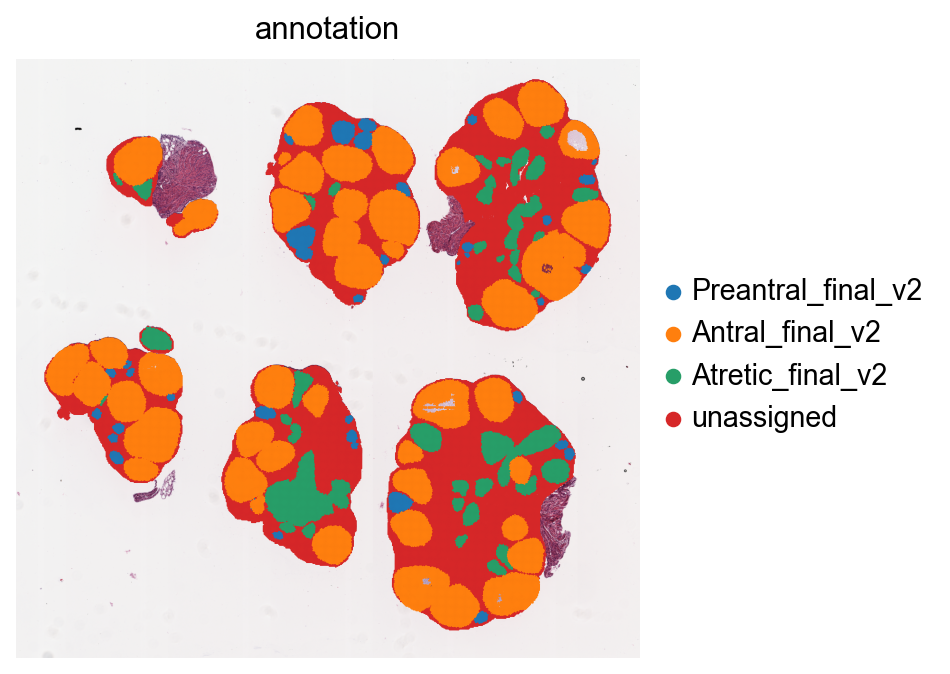

AAV : (150517, 3000)


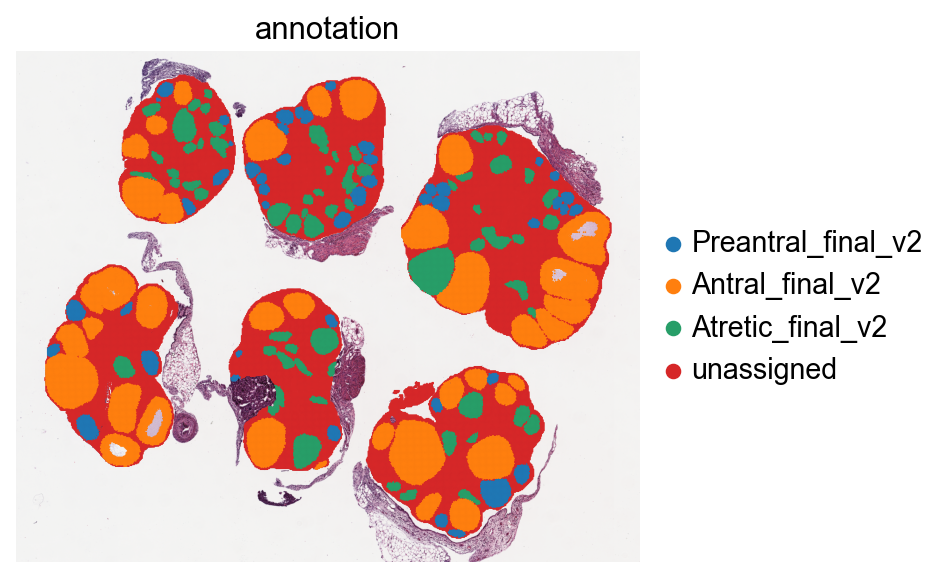

In [5]:
for sample in samples_dict.keys():
    print(sample, ":", adata_dict[sample].shape)
    sc.pl.spatial(adata_dict[sample], color=["annotation"], spot_size=30, frameon=False, wspace=0.3)

In [17]:
granulosa_combined = adata_dict[list(samples_dict.keys())[0]].raw.to_adata().concatenate([adata_dict[x].raw.to_adata() for x in list(samples_dict.keys())[1:]], batch_categories=list(samples_dict.keys()))
granulosa_combined.obs_names = [x.split("-")[0] + "-" + x.split("-")[1] for x in granulosa_combined.obs_names]
granulosa_combined

C:\Users\zyy\AppData\Local\Temp\ipykernel_31660\1056503345.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  granulosa_combined = adata_dict[list(samples_dict.keys())[0]].raw.to_adata().concatenate([adata_dict[x].raw.to_adata() for x in list(samples_dict.keys())[1:]], batch_categories=list(samples_dict.keys()))


AnnData object with n_obs × n_vars = 303411 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'leiden_1.0', 'leiden_1.2', 'leiden_1.5', 'annotation', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-AAV', 'mean_counts-AAV', 'log1p_mean_counts-AAV', 'pct_dropout_by_counts-AAV', 'total_counts-AAV', 'log1p_total_counts-AAV', 'highly_variable-AAV', 'means-AAV', 'dispersions-AAV', 'dispersions_norm-AAV', 'n_cells_by_counts-CTR', 'mean_counts-CTR', 'log1p_mean_counts-CTR', 'pct_dropout_by_counts-CTR', 'total_counts-CTR', 'log1p_total_counts-CTR', 'highly_variable-CTR', 'means-CTR', 'dispersions-CTR', 'dispersions_norm-CTR'
    obsm: 'X_pca', 'X_umap', 'spatial'

In [18]:
granulosa_combined.obs["annotation"] = granulosa_combined.obs["annotation"]
celltypes = {'Preantral_final': 'Preantral',
             'Antral_final': "Antral",
             'Atretic_final': "Atretic",
             'Preantral_final_v2': 'Preantral',
             'Antral_final_v2': "Antral",
             'Atretic_final_v2': "Atretic",
             "unassigned":"unassigned"}
granulosa_combined.obs["annotation"] = granulosa_combined.obs["annotation"].map(celltypes).astype("category")

In [79]:
colors = [
            '#279E68', # antral
            '#FF7F0E', # atretic
            # '#fb9a99', # Lytic
            
            '#1F77B4',
            '#FFFFF0',
            # immune
            
            ] # oocyte
# 添加颜色信息到adata.uns中
granulosa_combined.uns['annotation_colors'] = colors

[<Axes: title={'center': 'ctr'}, xlabel='spatial1', ylabel='spatial2'>]

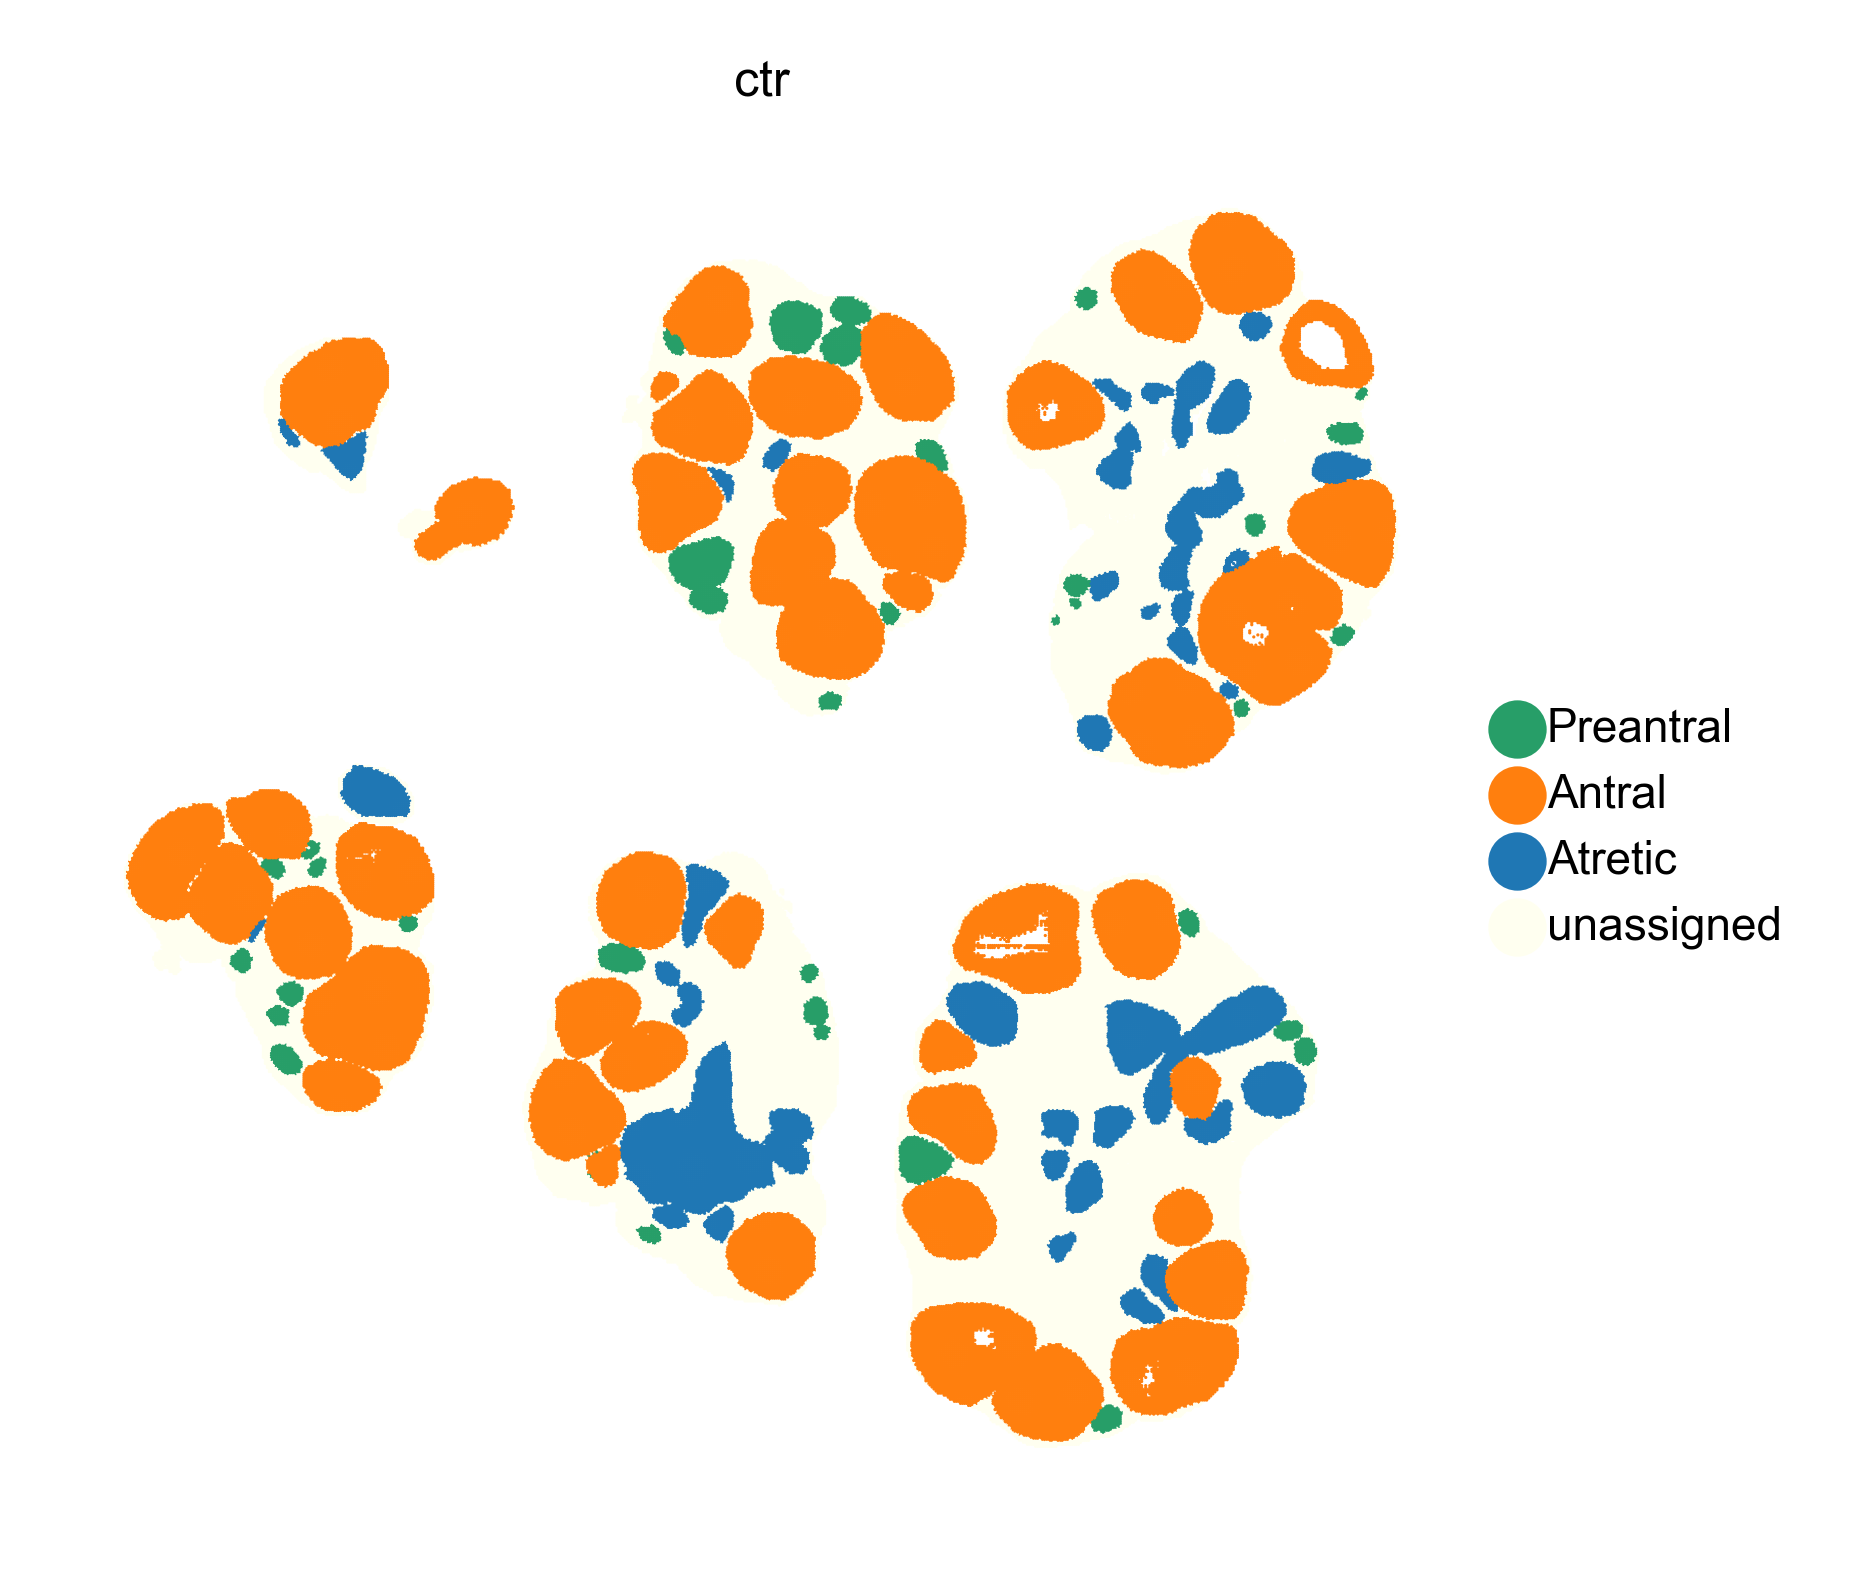

In [80]:
# 创建一个仅用于保存图例的图形
fig, ax = plt.subplots(figsize=(3, 6))  # 这里定义图例保存图形尺寸


subset = granulosa_combined[granulosa_combined.obs["batch"] == 'CTR']

sc.pl.spatial(subset, color=['annotation'], 
                wspace=0.0, hspace=0.0, spot_size=25, 
                frameon=False, title="ctr", show=False, ax=ax)


In [81]:
import scanpy as sc
import matplotlib.pyplot as plt

# 设置图形参数
sc.settings.set_figure_params(dpi=100, 
                              dpi_save=100, 
                              fontsize=10, 
                              facecolor='white', 
                              frameon=False, figsize=(12, 6),
                              vector_friendly=False, transparent=True, format="pdf")

grouping_var = "annotation"
samples = list(samples_dict.keys())
fig, axs = plt.subplots(1, len(samples), figsize=(len(samples) * 4, 8))

handles, labels = None, None  # 初始化图例变量

for i, sample in enumerate(samples):
    subset = granulosa_combined[granulosa_combined.obs["batch"] == sample]
    ax = axs[i]
    sc.pl.spatial(subset, color=[grouping_var], 
                  wspace=0.0, hspace=0.0, spot_size=30, 
                  frameon=False, title=sample, show=False, ax=ax, legend_loc=None)
    if handles is None and labels is None:  # 保存第一个子图的图例信息
        handles, labels = ax.get_legend_handles_labels()

# 仅在 handles 和 labels 不为 None 时添加全局图例
if handles and labels:
    # 使用子图外部的图例
    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)

plt.subplots_adjust(wspace=0, hspace=0)

# 保存图像为 PDF 文件
plt.savefig("figures/spatial_plot_follicle_color1.pdf", format='pdf', bbox_inches='tight')

# 关闭图形以节省内存
plt.close()


In [82]:
import matplotlib.pyplot as plt

# # 假设 handles 和 labels 从之前的图例中获取
# # 示例 handles 和 labels
# handles = [plt.Line2D([0], [0], color='red', lw=4, label='Label 1'),
#            plt.Line2D([0], [0], color='blue', lw=4, label='Label 2')]
# labels = ['Red Label', 'Blue Label']

# 创建一个仅用于保存图例的图形
fig, ax = plt.subplots(figsize=(2, 6))  # 这里定义图例保存图形尺寸


subset = granulosa_combined[granulosa_combined.obs["batch"] == 'CTR']

sc.pl.spatial(subset, color=[grouping_var], 
                wspace=0.0, hspace=0.0, spot_size=30, 
                frameon=False, title=sample, show=False, ax=ax, cmap="RdPu")




# 保存图像为 PDF 文件
plt.savefig("figures/spatial_plot_follicle_color1_legend.pdf", format='pdf', bbox_inches='tight')

# 关闭图形以节省内存
plt.close()



In [68]:
from pylab import *
cmap = cm.get_cmap('RdPu')
palette_custom = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
palette_custom[125]

C:\Users\zyy\AppData\Local\Temp\ipykernel_27040\3991572267.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdPu')


'#f76ca3'

In [19]:
colors = ['#fa97b2',
            '#e5439a', # antral
             # preantral
            # '#fb9a99', # Lytic
             '#f76ca3',
             # atretic
            '#FFFFFF',
            # immune
            
            ] # oocyte
# 添加颜色信息到adata.uns中
granulosa_combined.uns['annotation_colors'] = colors

[<Axes: title={'center': 'ctr'}, xlabel='spatial1', ylabel='spatial2'>]

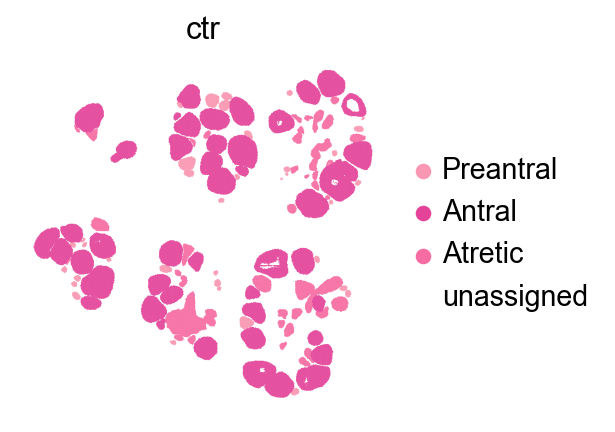

In [9]:
subset = granulosa_combined[granulosa_combined.obs["batch"] == 'CTR']
# 创建一个仅用于保存图例的图形
fig, ax = plt.subplots(figsize=(3, 6))  # 这里定义图例保存图形尺寸


sc.pl.spatial(subset, color=['annotation'], 
                wspace=0.0, hspace=0.0, spot_size=25, 
                frameon=False, title="ctr", show=False, ax=ax)


In [55]:
import scanpy as sc
import matplotlib.pyplot as plt

# 设置图形参数
sc.settings.set_figure_params(dpi=100, 
                              dpi_save=100, 
                              fontsize=10, 
                              facecolor='white', 
                              frameon=False, figsize=(12, 6),
                              vector_friendly=False, transparent=True, format="pdf")

grouping_var = "annotation"
samples = list(samples_dict.keys())
fig, axs = plt.subplots(1, len(samples), figsize=(len(samples) * 4, 8))

handles, labels = None, None  # 初始化图例变量

for i, sample in enumerate(samples):
    subset = granulosa_combined[granulosa_combined.obs["batch"] == sample]
    ax = axs[i]
    sc.pl.spatial(subset, color=[grouping_var], 
                  wspace=0.0, hspace=0.0, spot_size=30, 
                  frameon=False, title=sample, show=False, ax=ax, legend_loc=None)
    if handles is None and labels is None:  # 保存第一个子图的图例信息
        handles, labels = ax.get_legend_handles_labels()

# 仅在 handles 和 labels 不为 None 时添加全局图例
if handles and labels:
    # 使用子图外部的图例
    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)

plt.subplots_adjust(wspace=0, hspace=0)

# 保存图像为 PDF 文件
plt.savefig("figures/spatial_plot_follicle_color2.pdf", format='pdf', bbox_inches='tight')

# 关闭图形以节省内存
plt.close()


In [56]:
import matplotlib.pyplot as plt

# # 假设 handles 和 labels 从之前的图例中获取
# # 示例 handles 和 labels
# handles = [plt.Line2D([0], [0], color='red', lw=4, label='Label 1'),
#            plt.Line2D([0], [0], color='blue', lw=4, label='Label 2')]
# labels = ['Red Label', 'Blue Label']

# 创建一个仅用于保存图例的图形
fig, ax = plt.subplots(figsize=(2, 6))  # 这里定义图例保存图形尺寸


subset = granulosa_combined[granulosa_combined.obs["batch"] == 'CTR']

sc.pl.spatial(subset, color=[grouping_var], 
                wspace=0.0, hspace=0.0, spot_size=30, 
                frameon=False, title=sample, show=False, ax=ax, cmap="RdPu")




# 保存图像为 PDF 文件
plt.savefig("figures/spatial_plot_follicle_color2_legend.pdf", format='pdf', bbox_inches='tight')

# 关闭图形以节省内存
plt.close()



In [15]:
# 读取 .h5ad 文件
adata = sc.read_h5ad("pyobjs/slideseq_cell2loc_level0.h5ad")

# 移除后缀 '-AAV' 或 '-CTR'
new_obs_names = adata.obs_names.str.replace('-AAV', '').str.replace('-CTR', '')

# 将修改后的名字重新赋值给 obs_names
adata.obs_names = new_obs_names
adata.obs_names

Index(['s_008um_00301_00321-1', 's_008um_00593_00642-1',
       's_008um_00630_00352-1', 's_008um_00598_00455-1',
       's_008um_00336_00497-1', 's_008um_00275_00289-1',
       's_008um_00265_00607-1', 's_008um_00605_00343-1',
       's_008um_00284_00196-1', 's_008um_00521_00423-1',
       ...
       's_008um_00238_00438-1', 's_008um_00631_00323-1',
       's_008um_00197_00639-1', 's_008um_00536_00521-1',
       's_008um_00548_00323-1', 's_008um_00252_00421-1',
       's_008um_00565_00244-1', 's_008um_00309_00193-1',
       's_008um_00373_00222-1', 's_008um_00456_00755-1'],
      dtype='object', length=303411)

In [20]:
granulosa_combined.obs["Level0_max_pred_celltype"] = adata.obs["Level0_max_pred_celltype"]

In [21]:
granulosa_combined.obs["Level0_max_pred_celltype"].value_counts()

Level0_max_pred_celltype
Granulosa      104479
Mesenchyme      94254
Endothelium     62662
Immune          20613
Epithelium      19364
Oocyte           2039
Name: count, dtype: int64

In [22]:
granulosa_combined_new = granulosa_combined[granulosa_combined.obs["Level0_max_pred_celltype"].isin(["Granulosa"])]

In [23]:
granulosa_combined_new.obs["Level0_max_pred_celltype"].value_counts()

Level0_max_pred_celltype
Granulosa    104479
Name: count, dtype: int64

[<Axes: title={'center': 'ctr'}, xlabel='spatial1', ylabel='spatial2'>]

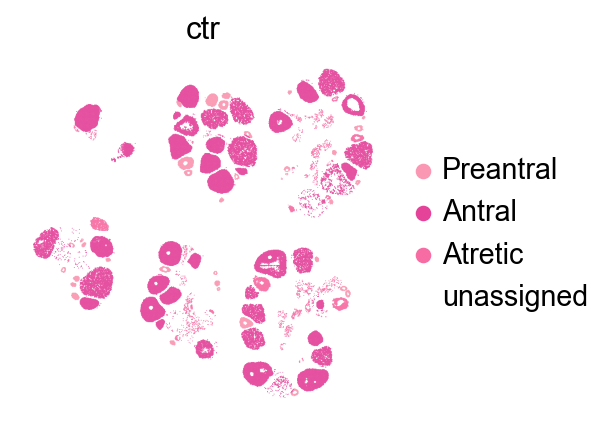

In [73]:
# 创建一个仅用于保存图例的图形
fig, ax = plt.subplots(figsize=(3, 6))  # 这里定义图例保存图形尺寸


subset = granulosa_combined_new[granulosa_combined_new.obs["batch"] == 'CTR']

sc.pl.spatial(subset, color=['annotation'], 
                wspace=0.0, hspace=0.0, spot_size=25, 
                frameon=False, title="ctr", show=False, ax=ax)

In [24]:
import scanpy as sc
import matplotlib.pyplot as plt

# 设置图形参数
sc.settings.set_figure_params(dpi=100, 
                              dpi_save=100, 
                              fontsize=10, 
                              facecolor='white', 
                              frameon=False, figsize=(12, 6),
                              vector_friendly=False, transparent=True, format="pdf")

grouping_var = "annotation"
samples = list(samples_dict.keys())
fig, axs = plt.subplots(1, len(samples), figsize=(len(samples) * 4, 8))

handles, labels = None, None  # 初始化图例变量

for i, sample in enumerate(samples):
    subset = granulosa_combined_new[granulosa_combined_new.obs["batch"] == sample]
    ax = axs[i]
    sc.pl.spatial(subset, color=[grouping_var], 
                  wspace=0.0, hspace=0.0, spot_size=30, 
                  frameon=False, title=sample, show=False, ax=ax, legend_loc=None)
    if handles is None and labels is None:  # 保存第一个子图的图例信息
        handles, labels = ax.get_legend_handles_labels()

# 仅在 handles 和 labels 不为 None 时添加全局图例
if handles and labels:
    # 使用子图外部的图例
    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)

plt.subplots_adjust(wspace=0, hspace=0)

# 保存图像为 PDF 文件
plt.savefig("figures/spatial_plot_follicle_color3_sample.pdf", format='pdf', bbox_inches='tight')

# 关闭图形以节省内存
plt.close()


In [25]:
import matplotlib.pyplot as plt

# # 假设 handles 和 labels 从之前的图例中获取
# # 示例 handles 和 labels
# handles = [plt.Line2D([0], [0], color='red', lw=4, label='Label 1'),
#            plt.Line2D([0], [0], color='blue', lw=4, label='Label 2')]
# labels = ['Red Label', 'Blue Label']

# 创建一个仅用于保存图例的图形
fig, ax = plt.subplots(figsize=(2, 6))  # 这里定义图例保存图形尺寸


subset = granulosa_combined_new[granulosa_combined_new.obs["batch"] == 'CTR']

sc.pl.spatial(subset, color=[grouping_var], 
                wspace=0.0, hspace=0.0, spot_size=30, 
                frameon=False, title=sample, show=False, ax=ax, cmap="RdPu")




# 保存图像为 PDF 文件
plt.savefig("figures/spatial_plot_follicle_color3_sample_legend.pdf", format='pdf', bbox_inches='tight')

# 关闭图形以节省内存
plt.close()



In [10]:
import scanpy as sc
import numpy as np

# 假设你已经加载了 granulosa_combined
# granulosa_combined = sc.read_h5ad("path_to_granulosa_combined.h5ad")

# 确保 obs_names 唯一
granulosa_combined.obs_names_make_unique()

# 随机选择 10,000 个细胞索引
np.random.seed(42)  # 设置随机种子以保证结果可重复
random_indices = np.random.choice(granulosa_combined.obs_names, 150000, replace=False)

# 创建新的 AnnData 对象
granulosa_combined_new = granulosa_combined[random_indices, :].copy()

# 输出一些信息以确认处理结果
print(granulosa_combined_new)

# # 保存新的 AnnData 对象
# granulosa_combined_new.write("path_to_granulosa_combined_new.h5ad")



AnnData object with n_obs × n_vars = 150000 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'leiden_1.0', 'leiden_1.2', 'leiden_1.5', 'annotation', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-AAV', 'mean_counts-AAV', 'log1p_mean_counts-AAV', 'pct_dropout_by_counts-AAV', 'total_counts-AAV', 'log1p_total_counts-AAV', 'highly_variable-AAV', 'means-AAV', 'dispersions-AAV', 'dispersions_norm-AAV', 'n_cells_by_counts-CTR', 'mean_counts-CTR', 'log1p_mean_counts-CTR', 'pct_dropout_by_counts-CTR', 'total_counts-CTR', 'log1p_total_counts-CTR', 'highly_variable-CTR', 'means-CTR', 'dispersions-CTR', 'dispersions_norm-CTR'
    uns: 'annotation_colors'
    obsm: 'X_pca', 'X_umap', 'spatial'


In [75]:
# colors = ['#f76ca3',
#             '#FF5575', # antral
#              # preantral
#             # '#fb9a99', # Lytic
#             '#fa97b2',
#              # atretic
#             '#FFFFFF',
#             # immune
            
#             ] # oocyte
# # 添加颜色信息到adata.uns中
# granulosa_combined_new.uns['annotation_colors'] = colors

[<Axes: title={'center': 'ctr'}, xlabel='spatial1', ylabel='spatial2'>]

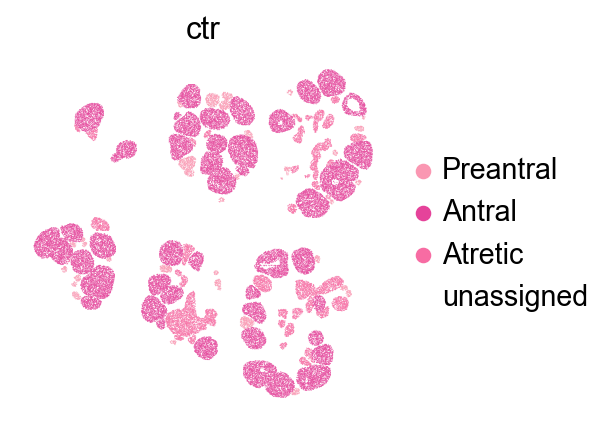

In [11]:
# 创建一个仅用于保存图例的图形
fig, ax = plt.subplots(figsize=(3, 6))  # 这里定义图例保存图形尺寸


subset = granulosa_combined_new[granulosa_combined_new.obs["batch"] == 'CTR']

sc.pl.spatial(subset, color=['annotation'], 
                wspace=0.0, hspace=0.0, spot_size=25, 
                frameon=False, title="ctr", show=False, ax=ax)

In [12]:
import scanpy as sc
import matplotlib.pyplot as plt

# 设置图形参数
sc.settings.set_figure_params(dpi=100, 
                              dpi_save=100, 
                              fontsize=10, 
                              facecolor='white', 
                              frameon=False, figsize=(12, 6),
                              vector_friendly=False, transparent=True, format="pdf")

grouping_var = "annotation"
samples = list(samples_dict.keys())
fig, axs = plt.subplots(1, len(samples), figsize=(len(samples) * 4, 8))

handles, labels = None, None  # 初始化图例变量

for i, sample in enumerate(samples):
    subset = granulosa_combined_new[granulosa_combined_new.obs["batch"] == sample]
    ax = axs[i]
    sc.pl.spatial(subset, color=[grouping_var], 
                  wspace=0.0, hspace=0.0, spot_size=30, 
                  frameon=False, title=sample, show=False, ax=ax, legend_loc=None)
    if handles is None and labels is None:  # 保存第一个子图的图例信息
        handles, labels = ax.get_legend_handles_labels()

# 仅在 handles 和 labels 不为 None 时添加全局图例
if handles and labels:
    # 使用子图外部的图例
    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)

plt.subplots_adjust(wspace=0, hspace=0)

# 保存图像为 PDF 文件
plt.savefig("figures/spatial_plot_follicle_color2_sample.pdf", format='pdf', bbox_inches='tight')

# 关闭图形以节省内存
plt.close()


In [13]:
import matplotlib.pyplot as plt

# # 假设 handles 和 labels 从之前的图例中获取
# # 示例 handles 和 labels
# handles = [plt.Line2D([0], [0], color='red', lw=4, label='Label 1'),
#            plt.Line2D([0], [0], color='blue', lw=4, label='Label 2')]
# labels = ['Red Label', 'Blue Label']

# 创建一个仅用于保存图例的图形
fig, ax = plt.subplots(figsize=(2, 6))  # 这里定义图例保存图形尺寸


subset = granulosa_combined_new[granulosa_combined_new.obs["batch"] == 'CTR']

sc.pl.spatial(subset, color=[grouping_var], 
                wspace=0.0, hspace=0.0, spot_size=30, 
                frameon=False, title=sample, show=False, ax=ax, cmap="RdPu")




# 保存图像为 PDF 文件
plt.savefig("figures/spatial_plot_follicle_color2_sample_legend.pdf", format='pdf', bbox_inches='tight')

# 关闭图形以节省内存
plt.close()



In [88]:
granulosa_combined = granulosa_combined[~granulosa_combined.obs["annotation"].isin(["unassigned"])]

In [89]:
granulosa_combined.obs["annotation"].value_counts()

annotation
Antral       118056
Atretic       34085
Preantral     14633
Name: count, dtype: int64

In [90]:
# granulosa_combined.write_h5ad("./Integrate/follicle_annotated.h5ad")

In [3]:
granulosa_combined = sc.read_h5ad("./Integrate/follicle_annotated.h5ad")

f:\anaconda\envs\napari-squidpy\lib\site-packages\anndata\_core\anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
# 重新排序 annotation 组别
desired_order = ['Preantral', 'Antral','Atretic']
granulosa_combined.obs['annotation'] = pd.Categorical(
    granulosa_combined.obs['annotation'],
    categories=desired_order,
    ordered=True
)

In [5]:
granulosa_combined.obs["annotation"].value_counts()

annotation
Antral       118056
Atretic       34085
Preantral     14633
Name: count, dtype: int64

In [6]:
sc.tl.rank_genes_groups(granulosa_combined, 
                        groupby="annotation", 
                        key_added="rank_gene_groups_annotation", method="wilcoxon")

In [7]:
sc.tl.dendrogram(granulosa_combined, groupby="annotation")

In [8]:
annotation_key = 'rank_gene_groups_annotation'

# 获取 uns 中的 rank genes groups 注释
current_annotations = granulosa_combined.uns[annotation_key]['names'].dtype.names

# 重新排序 annotation 组别
desired_order = ['Preantral', 'Antral', 'Atretic']
sorted_indices = [current_annotations.index(name) for name in desired_order if name in current_annotations]

# 重新排列数据
new_rank_genes_uns = {}
for key, value in granulosa_combined.uns[annotation_key].items():
    if isinstance(value, np.ndarray) and value.ndim > 1:
        new_rank_genes_uns[key] = value[:, sorted_indices]
    else:
        new_rank_genes_uns[key] = value

# 更新 uns
granulosa_combined.uns[annotation_key] = new_rank_genes_uns

Original cmap N: 256
Custom palette length: 205
New cmap length: 205


C:\Users\zyy\AppData\Local\Temp\ipykernel_5672\1733111773.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdPu')


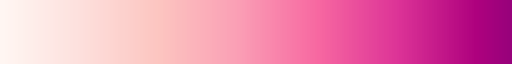

In [18]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm

# 获取原始cmap
cmap = cm.get_cmap('RdPu')

# 检查原始cmap中的颜色数量
print("Original cmap N:", cmap.N)

# 创建自定义调色板
palette_custom = [mcolors.rgb2hex(cmap(i)) for i in range(1,cmap.N - 50)]
print("Custom palette length:", len(palette_custom))

# 使用自定义调色板创建新的colormap
new_cmap = mcolors.ListedColormap(palette_custom)

# 检查新的colormap的长度
print("New cmap length:", len(new_cmap.colors))

new_cmap


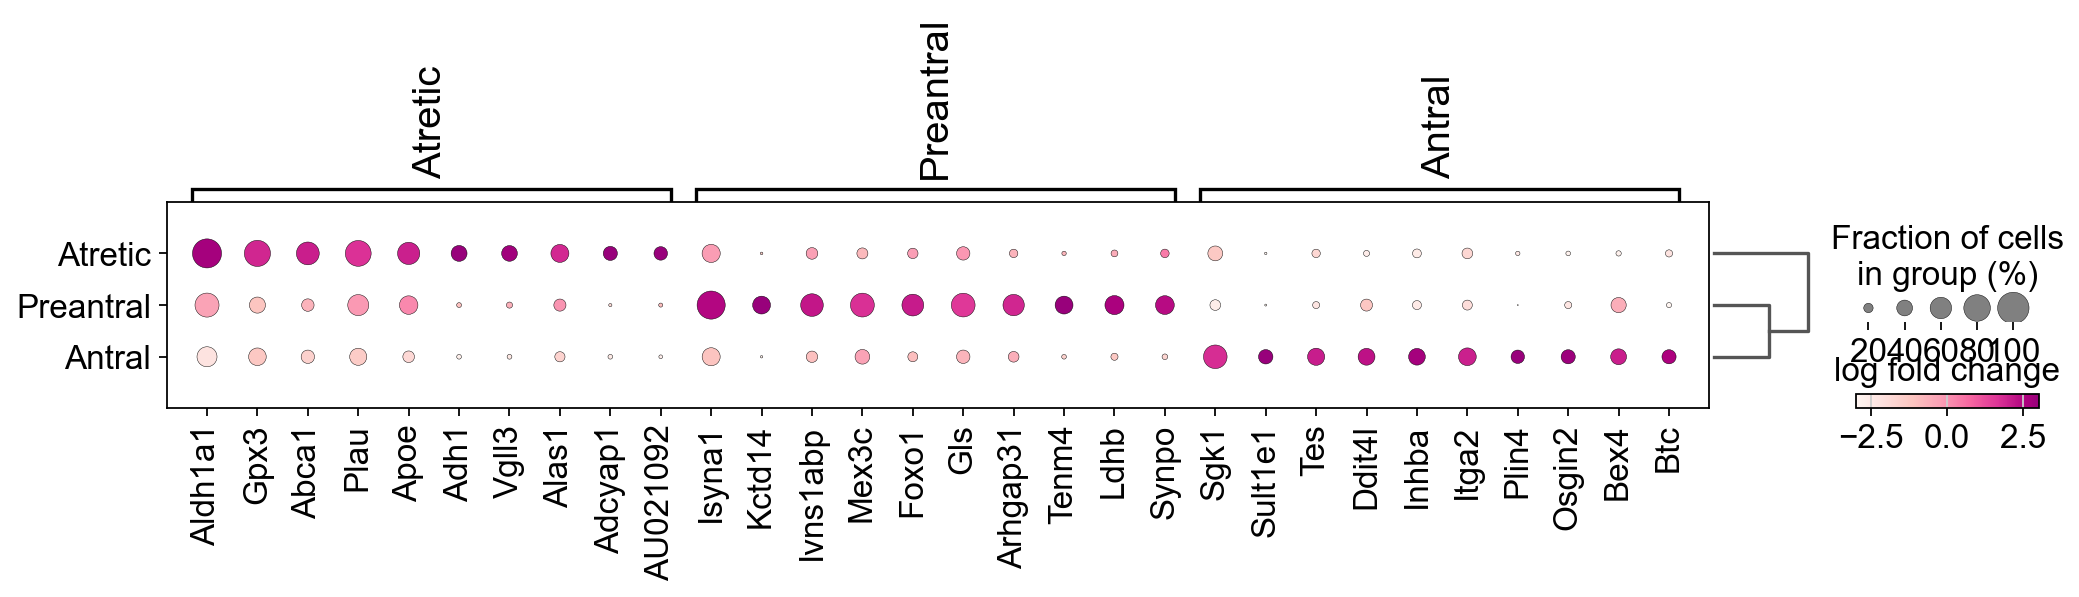

In [19]:
sc.settings.set_figure_params(dpi=80, fontsize=18, 
                              facecolor='white', frameon=True, 
                              figsize=(8, 5))
sc.pl.rank_genes_groups_dotplot(granulosa_combined, n_genes=10, 
                                key="rank_gene_groups_annotation", 
                                values_to_plot='logfoldchanges', 
                                groupby='annotation',
                                cmap=new_cmap, min_logfoldchange=1.5, 
                                vmin = -3.0, vmax = 3.0, figsize = (15,1.7), 
                                save="granulosa_subtype_markers")
# sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(2, 2))

categories: Preantral, Antral, Atretic
var_group_labels: Preantral, Antral


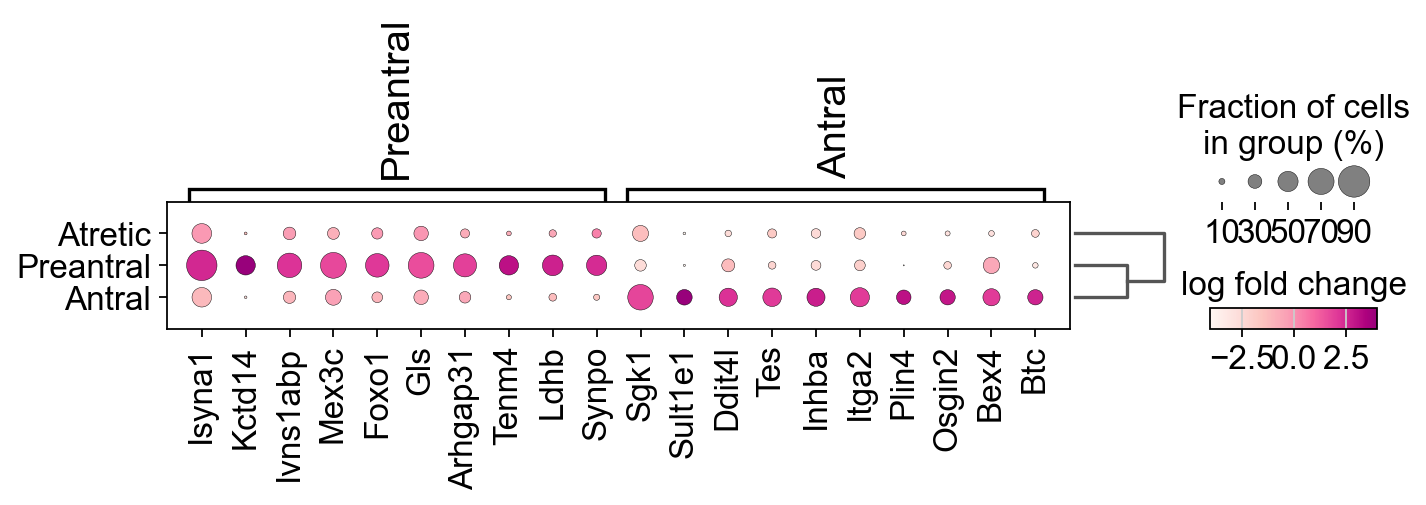

In [22]:
var_names = {'Preantral':['Isyna1','Kctd14','Ivns1abp','Mex3c','Foxo1','Gls','Arhgap31','Tenm4','Ldhb','Synpo'] ,
              'Antral': ['Sgk1', 'Sult1e1', 'Ddit4l','Tes','Inhba','Itga2','Plin4','Osgin2','Bex4','Btc']
            #   'Atretic': ['Aldh1a1', 'Gpx3', 'Abca1','Plau','Apoe','Adh1','Vgll3','Alas1','Abcb1b','Adcyap1'] 
              }
sc.pl.rank_genes_groups_dotplot(
    granulosa_combined,
    key="rank_gene_groups_annotation",
    var_names=var_names,
    values_to_plot="logfoldchanges",
    cmap=new_cmap,
    vmin=-4,
    vmax=4,
    min_logfoldchange=3,save="granulosa_subtype_markers_an_pre",
    colorbar_title='log fold change'
)

In [98]:
marker_list = list()
for group in granulosa_combined.uns['rank_gene_groups_annotation']['names'].dtype.names:
    markers = sc.get.rank_genes_groups_df(granulosa_combined, key='rank_gene_groups_annotation', group = group).head(50)
    markers["celltypes"] = group
    marker_list.append(markers)

In [99]:
marker_list

[       names      scores  logfoldchanges  pvals  pvals_adj  celltypes
 0     Isyna1  131.537506        2.480841    0.0        0.0  Preantral
 1     Kctd14   88.027748        4.370098    0.0        0.0  Preantral
 2   Ivns1abp   87.848732        2.205000    0.0        0.0  Preantral
 3      Mex3c   87.068550        1.723560    0.0        0.0  Preantral
 4      Foxo1   83.740028        2.103153    0.0        0.0  Preantral
 5        Gls   82.746910        1.593055    0.0        0.0  Preantral
 6   Arhgap31   81.059654        1.915906    0.0        0.0  Preantral
 7    Carhsp1   80.492416        1.435471    0.0        0.0  Preantral
 8      Tenm4   80.081856        3.068640    0.0        0.0  Preantral
 9       Ldhb   79.793785        2.648105    0.0        0.0  Preantral
 10     Syne2   77.924881        1.320192    0.0        0.0  Preantral
 11     Synpo   77.693413        2.401209    0.0        0.0  Preantral
 12      Alad   76.265038        1.880306    0.0        0.0  Preantral
 13   

In [100]:
pd.concat(marker_list).to_csv("./csv/SuppTable1_follicle_marker.csv", index=False)

C:\Users\zyy\AppData\Local\Temp\ipykernel_11436\4168555325.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20')


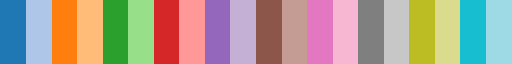

In [101]:
from pylab import *
cmap = cm.get_cmap('tab20')
palette_custom = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
cmap

In [102]:
granulosa_combined.obs.annotation.value_counts()

annotation
Antral       118056
Atretic       34085
Preantral     14633
Name: count, dtype: int64

f:\anaconda\envs\napari-squidpy\lib\site-packages\scanpy\plotting\_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


Index(['Preantral', 'Antral', 'Atretic'], dtype='object')
Index(['Preantral', 'Antral', 'Atretic'], dtype='object')


f:\anaconda\envs\napari-squidpy\lib\site-packages\scanpy\plotting\_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


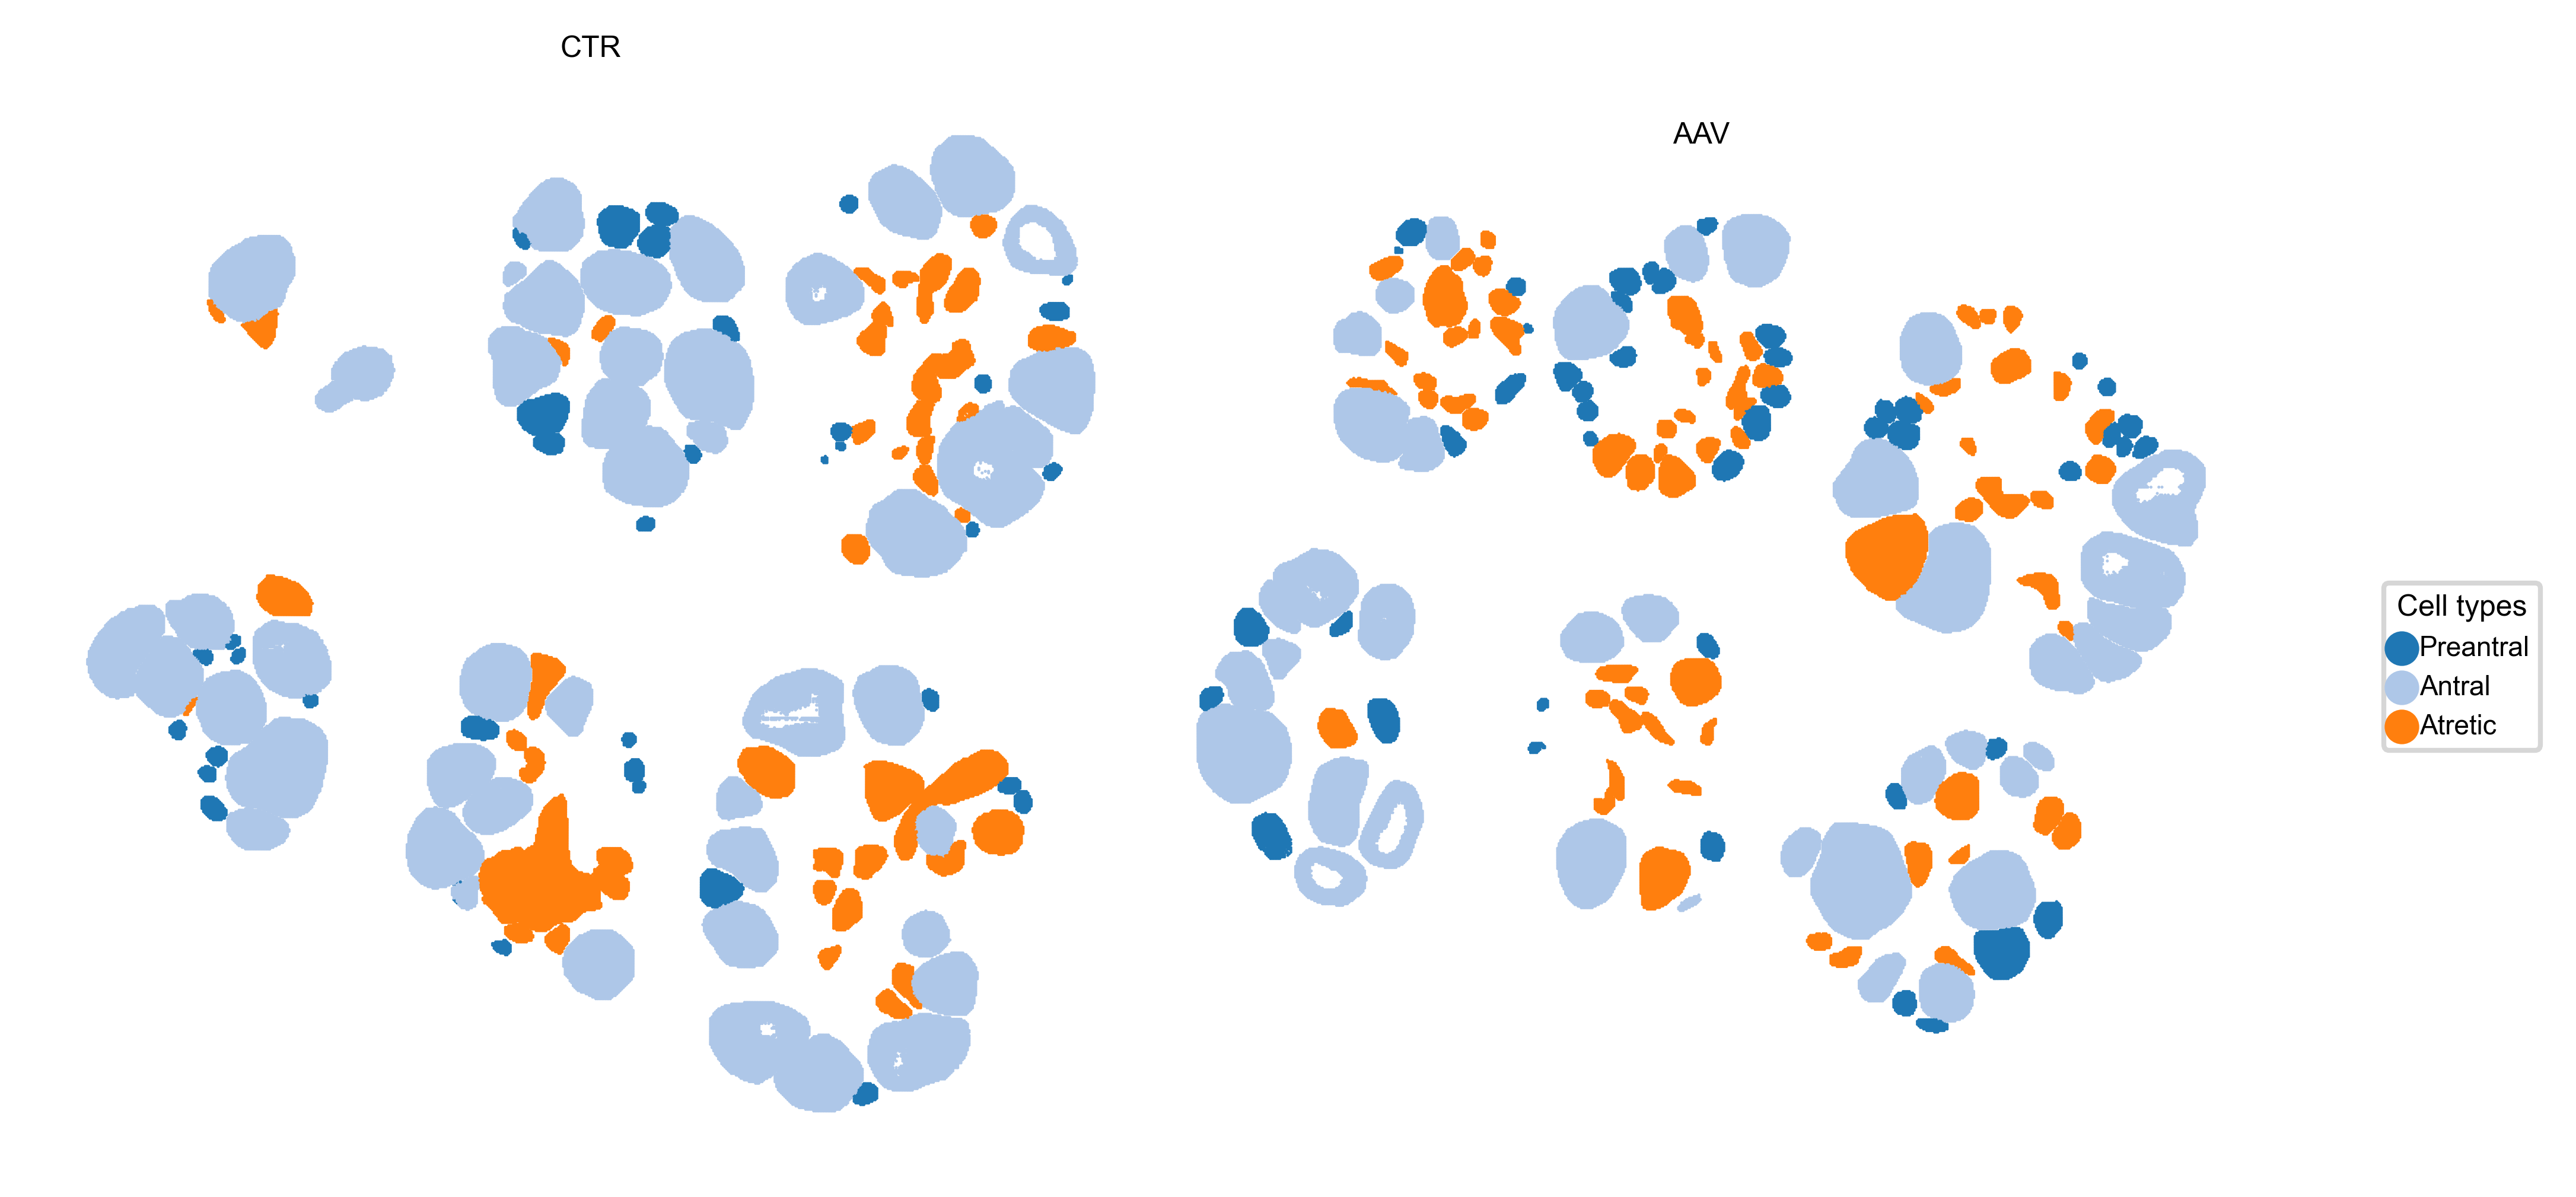

In [103]:
import matplotlib.pyplot as plt
import scanpy as sc

# Set figure parameters
sc.settings.set_figure_params(dpi=300, dpi_save=300, 
                              fontsize=6, facecolor='white', 
                              frameon=False, figsize=(2.0, 2.0), 
                              vector_friendly=True, transparent=True, 
                              format="pdf")

grouping_var = "annotation"

# Create a figure with subplots arranged in a 1x2 grid
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Loop through the samples to generate plots
for i, sample in enumerate(list(samples_dict.keys())[:2]):  # Limit to the first two samples
    subset = granulosa_combined[granulosa_combined.obs["batch"] == sample]
    # subset.obs[grouping_var] = subset.obs[grouping_var].cat.set_categories(cat_custom)
    print(subset.obs[grouping_var].cat.categories)
    
    # Plotting
    if i == 1:
        sc.pl.spatial(subset, color=[grouping_var], palette=palette_custom, wspace=0.0, hspace=0.0, spot_size=30, frameon=False, title=sample, show=False, ax=axs[i])
        handles, labels = axs[i].get_legend_handles_labels()
        axs[i].get_legend().remove()
    else:
        sc.pl.spatial(subset, color=[grouping_var], palette=palette_custom, wspace=0.0, hspace=0.0, spot_size=30, frameon=False, title=sample, show=False, legend_loc="none", ax=axs[i])

fig.legend(handles, labels, ncol=1, loc=6, bbox_to_anchor=(1.0, 0.5), title="Cell types")
plt.subplots_adjust(wspace=-0, hspace=0)


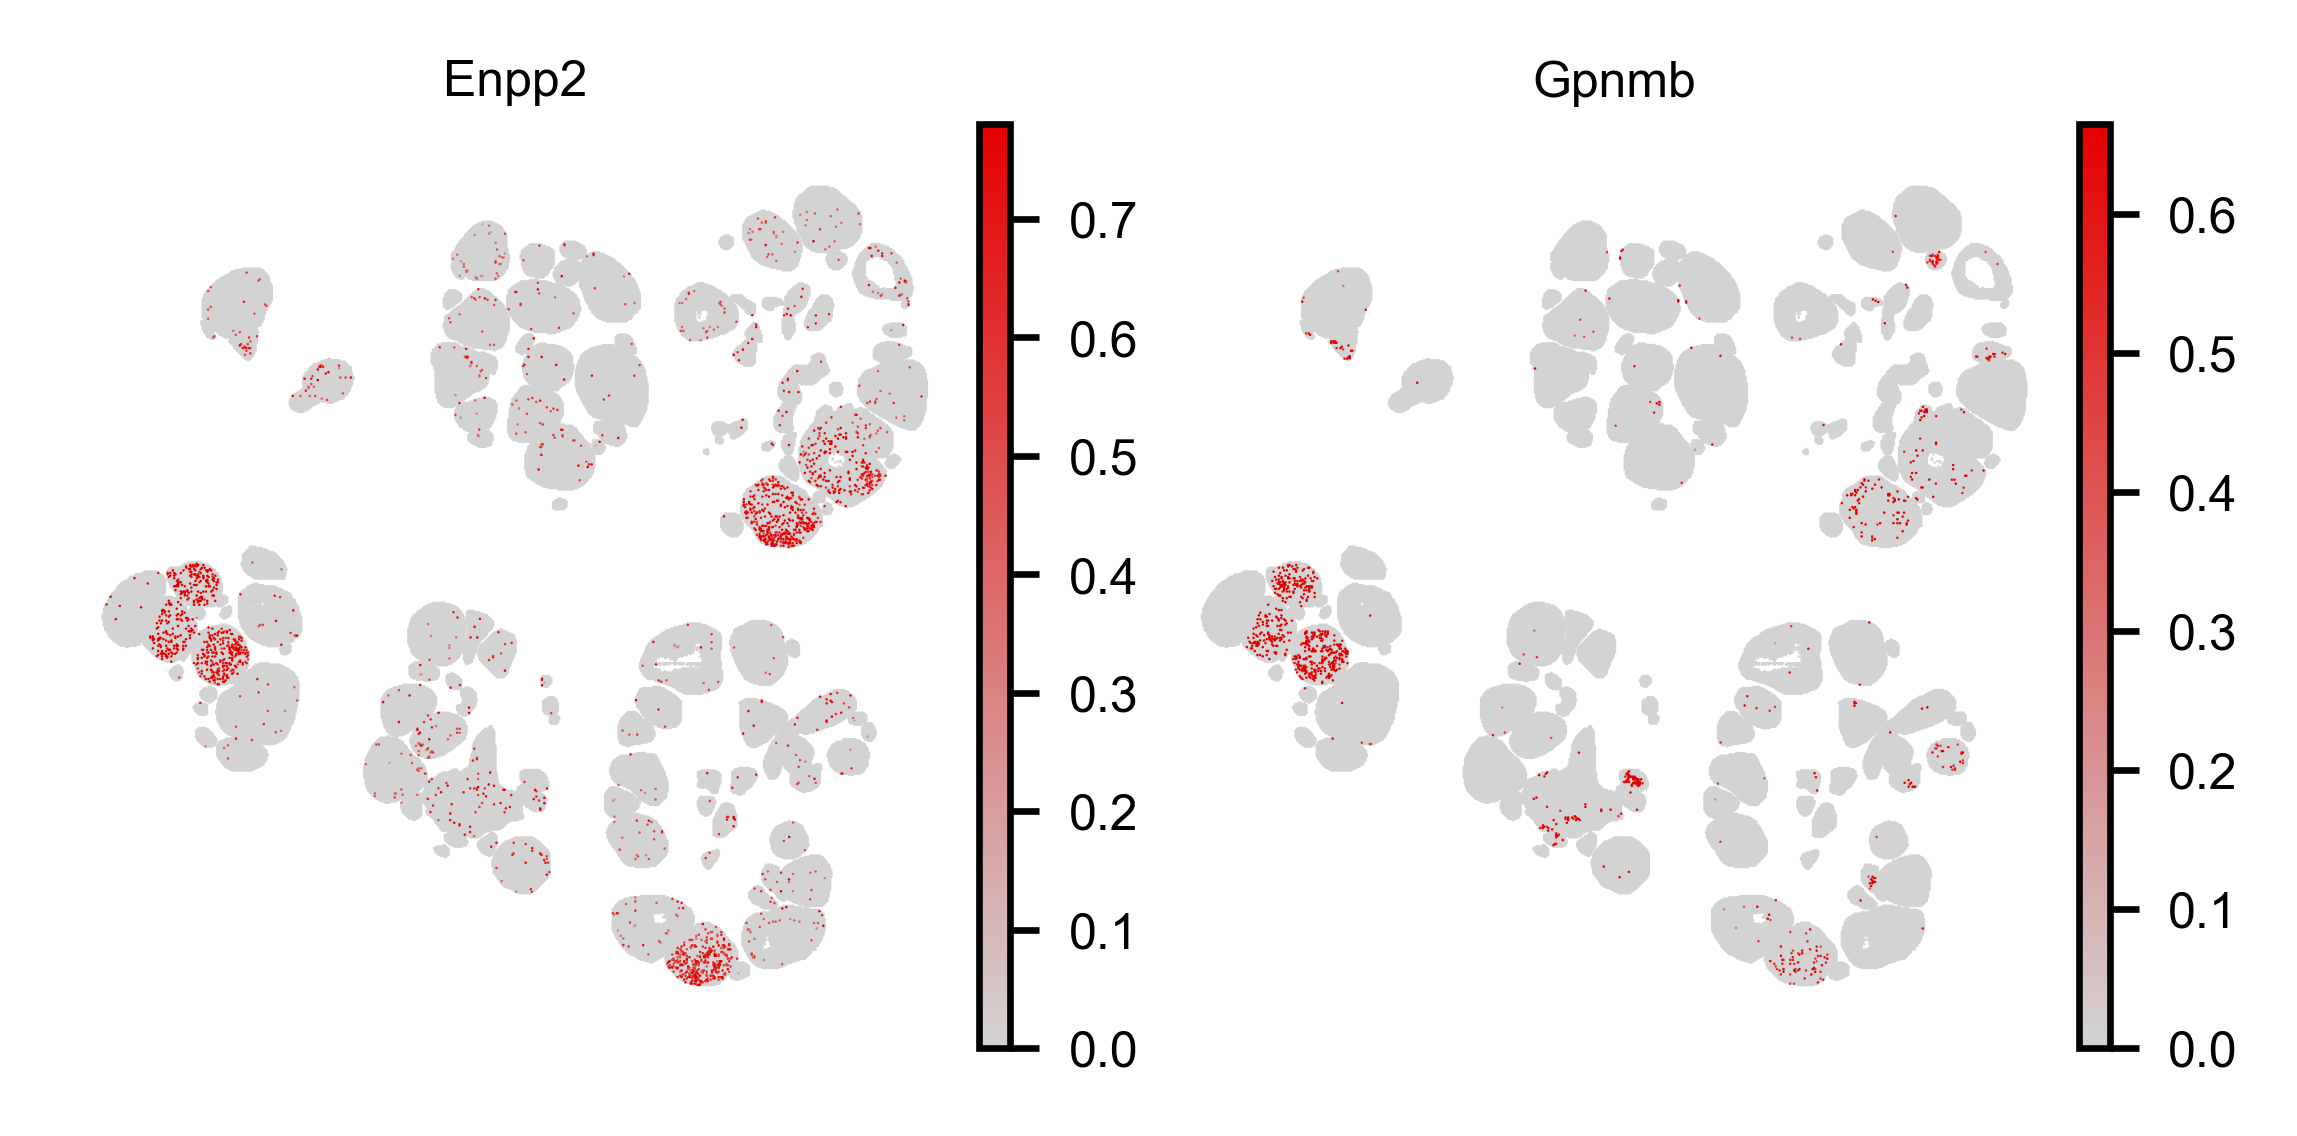

In [104]:
subset = granulosa_combined[granulosa_combined.obs["batch"] == "CTR"]
sc.pl.spatial(subset, color = ["Enpp2", "Gpnmb"], 
              cmap=sns.blend_palette(["lightgray", sns.xkcd_rgb["red"]], 
                                     as_cmap=True), 
              spot_size=30, ncols=2, wspace=0.1, vmin=0, vmax='p99.2')

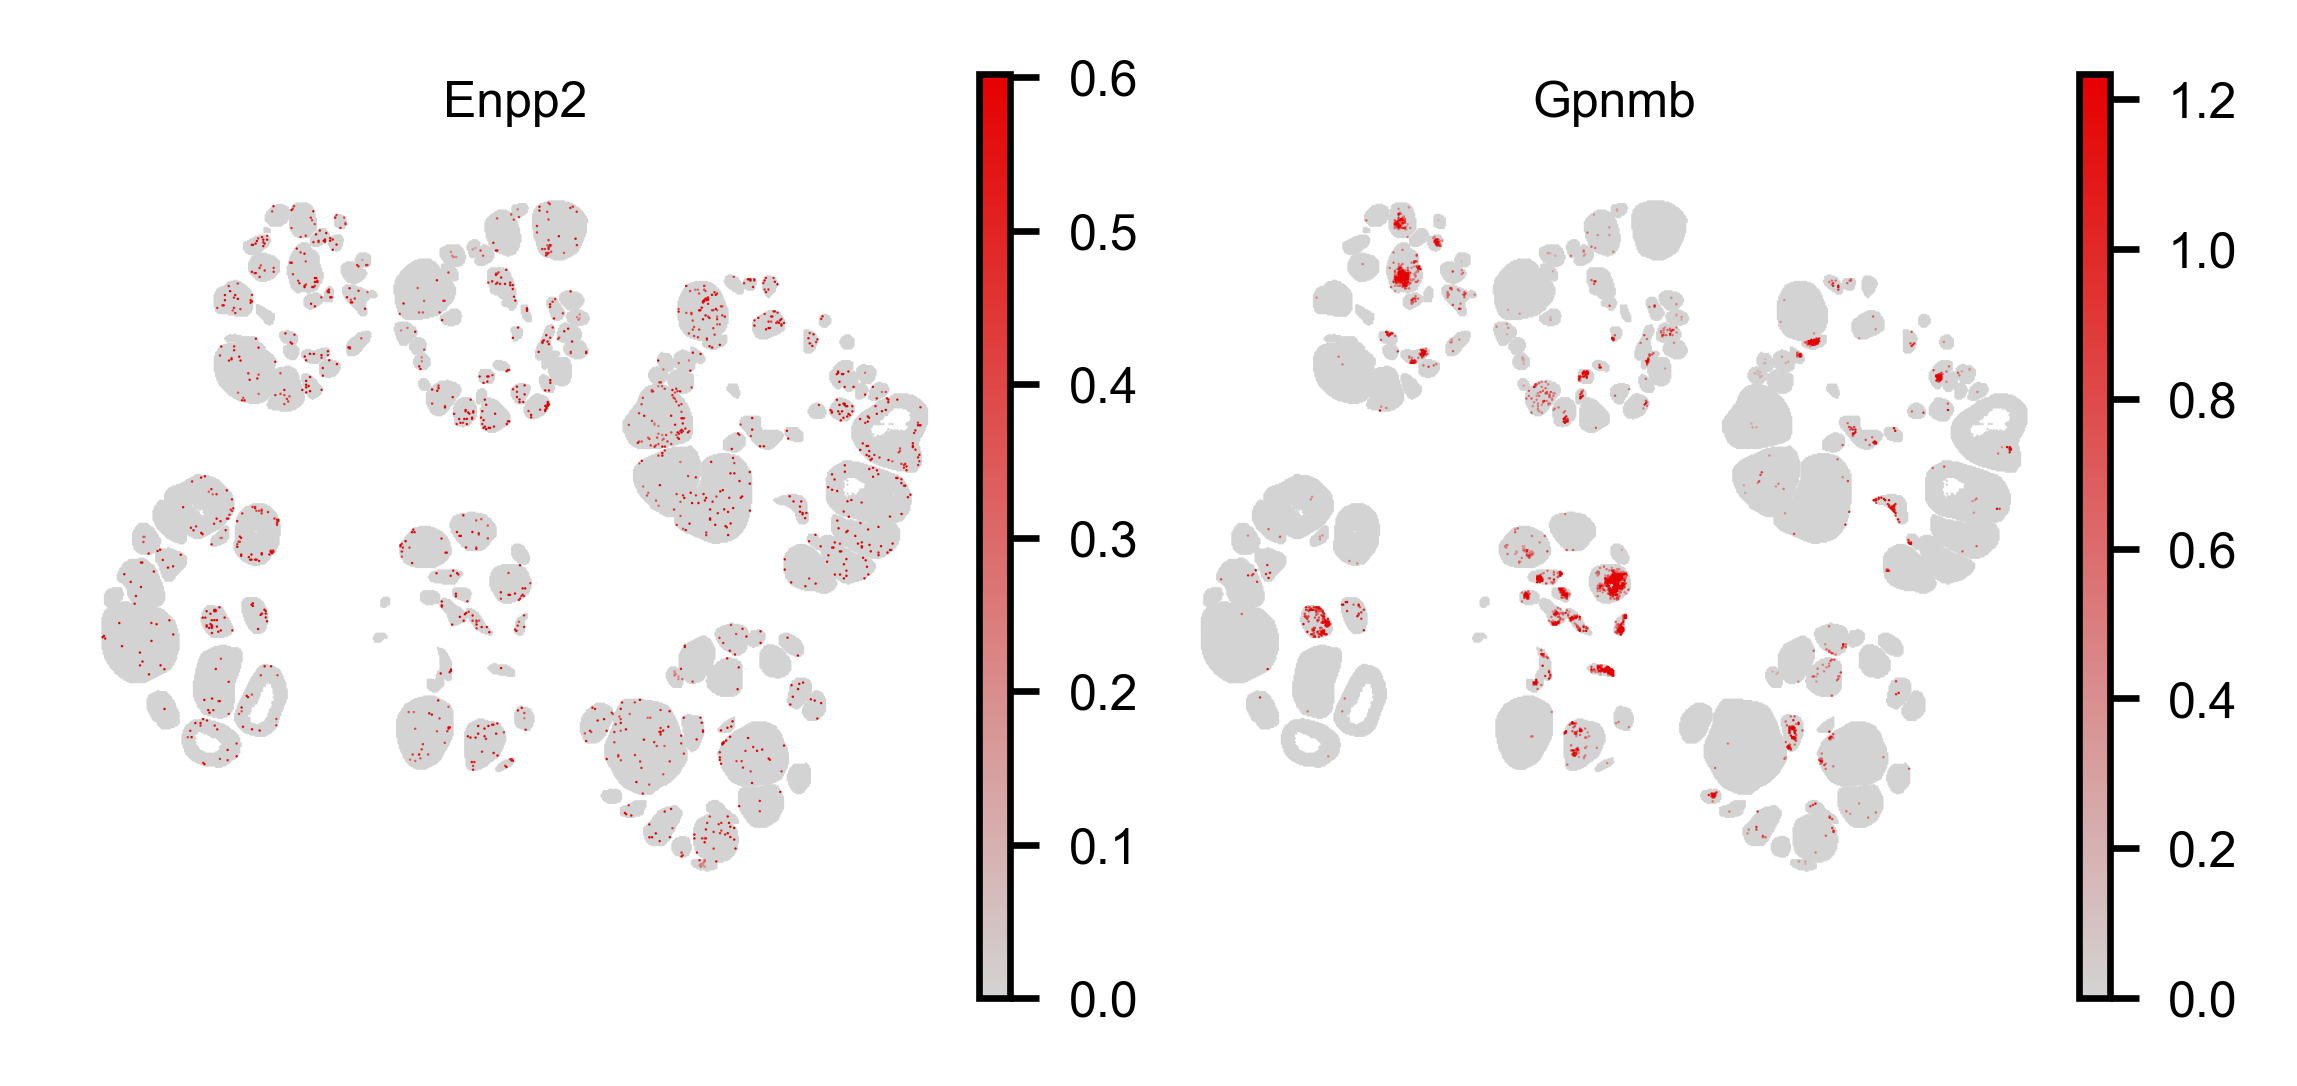

In [105]:
subset = granulosa_combined[granulosa_combined.obs["batch"] == "AAV"]
sc.pl.spatial(subset, color = ["Enpp2", "Gpnmb"], 
              cmap=sns.blend_palette(["lightgray", sns.xkcd_rgb["red"]], 
                                     as_cmap=True), 
              spot_size=30, ncols=2, wspace=0.1, vmin=0, vmax='p99.2')

In [106]:
granulosa_combined_subset = granulosa_combined[granulosa_combined.obs["annotation"].isin([ "Antral"])]

f:\anaconda\envs\napari-squidpy\lib\site-packages\scanpy\plotting\_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
f:\anaconda\envs\napari-squidpy\lib\site-packages\anndata\_core\anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


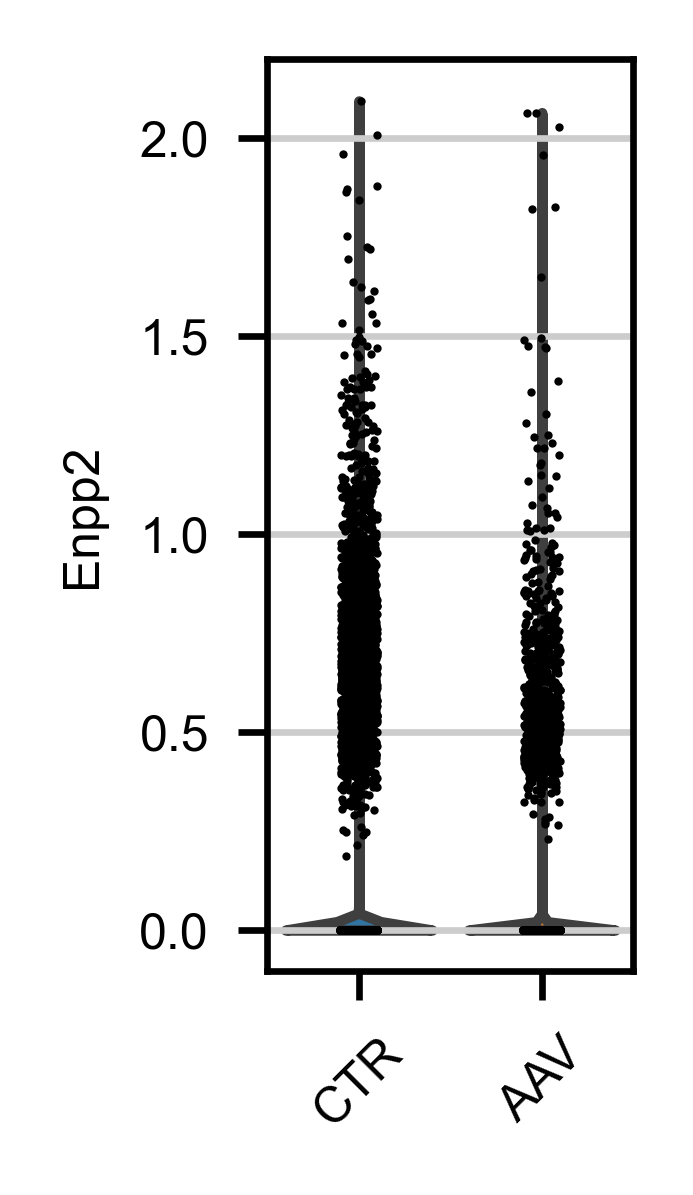

In [107]:
# Set figure parameters
sc.settings.set_figure_params(dpi=300, dpi_save=300, 
                              fontsize=6, facecolor='white', 
                              frameon=False, figsize=(2.0, 2.0), 
                              vector_friendly=True, transparent=True, 
                              format="pdf")
sc.pl.violin(granulosa_combined_subset, keys="Enpp2", 
                 groupby="batch",
                 log=False, use_raw=None, 
                 stripplot=True, jitter=True, 
                 size=1, layer=None, scale='width', 
                 order=None, multi_panel=None, xlabel='', 
                 ylabel=None, rotation=45, show=None, save=None, ax=None)

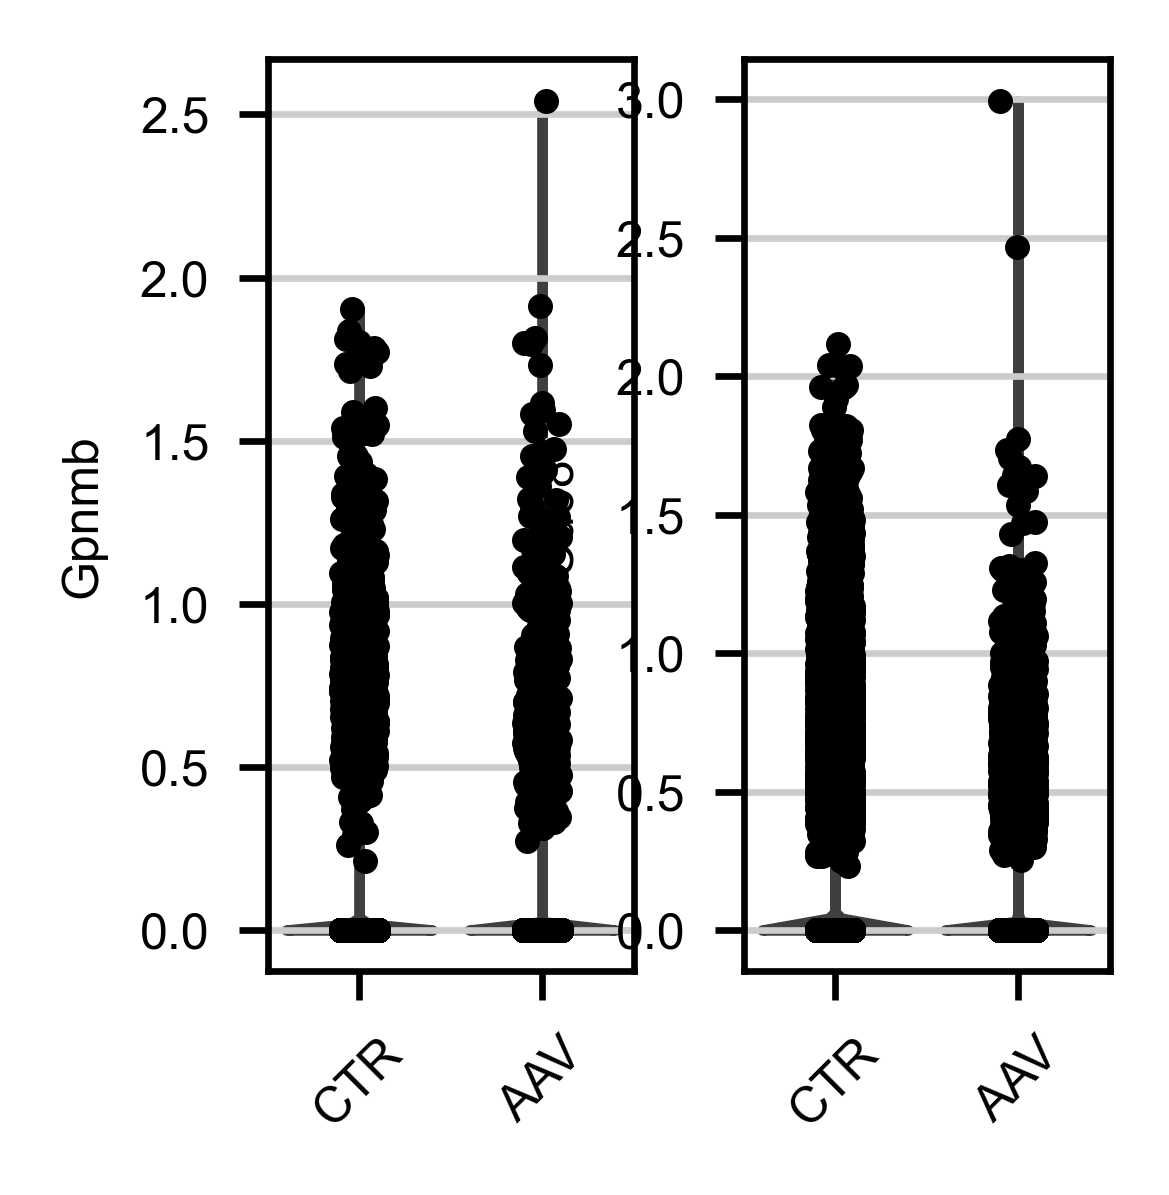

In [108]:
sc.pl.violin(granulosa_combined_subset, keys=["Gpnmb","Cd68"], 
                 groupby="batch",
                 log=False, use_raw=None, 
                 stripplot=True, jitter=True, 
                 size=3, layer=None, scale='width', 
                 order=None, multi_panel=None, xlabel='', 
                 ylabel=None, rotation=45, show=None, save=None, ax=None)

In [109]:
sc.tl.rank_genes_groups(adata=granulosa_combined_subset, groupby="batch", 
                        method="wilcoxon", 
                        key_added="rank_genes_df_ROI")

ranking genes


KeyboardInterrupt: 

In [161]:
result = granulosa_combined_subset.uns['rank_genes_df_ROI']
groups = result['names'].dtype.names
celltype_markers = pd.DataFrame(
    {group + '_' + key[:-1]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges','pvals']}).head(50)
celltype_markers

CTR_name  CTR_logfoldchange       CTR_pval  AAV_name  AAV_logfoldchange  \
0   mt-Cytb           0.318318   0.000000e+00      Tpt1           2.737406   
1      Trir           0.380656  2.660007e-198    mt-Co2           2.386772   
2     Atp5b           0.345986  3.171064e-161   Tsc22d1           2.439743   
3      Cct2           0.549758  3.181140e-140    mt-Co3           2.897961   
4      Gdi2           0.376658  1.599035e-138   mt-Atp8           3.136177   
5    Atp5j2           0.360623  8.469095e-131   mt-Atp6           3.140904   
6      Twf1           0.480030  1.031102e-126    Scarb1           3.032084   
7     Atp5e           0.332154  4.188952e-116     Ephx2           4.199082   
8   S100a11           0.247172  4.982371e-112   Slc25a3           3.285690   
9     Prdx1           0.232475  1.081257e-108    Chchd2           3.704347   
10   Dynll1           0.424726   5.346667e-91      Fth1           3.412891   
11    Psmd8           0.460393   3.827906e-90    mt-Co1           2.971761   
12     Glg1           0.259498   1.015007e-83     Acsl4           2.389002   
13  Atp6v0c           0.303570   1.772574e-81    Akr1a1           2.449679   
14      Gsn           0.754744   2.332874e-65     Ddx3x           3.252183   
15   Ndufa4           0.264268   3.046809e-60      Bzw1           1.560591   
16  Selenof           0.356340   1.770739e-56      Ctsl           2.914166   
17     Cct7           0.368216   6.614888e-56    mt-Nd4           2.908151   
18   Isyna1           0.191510   2.697538e-54    Maged1           2.771230   
19     Psap           0.190149   5.386537e-47     Actg1           3.170303   
20     Ppia           0.492724   2.505557e-45      Msi2           3.855867   
21    Aimp1           0.320307   1.267461e-42    Hs6st1           3.404042   
22    Tomm7           0.436497   1.295069e-40    Tagln2           3.543551   
23    Snrpe           0.290348   1.043908e-37  Serpinh1           2.532451   
24   Atpif1           0.133024   1.928154e-36     Timp1           3.560632   
25     P4hb           0.189134   2.536242e-36     Ddx17           2.351658   
26    Actr2           0.482428   5.872530e-35    Atp2a2           3.349772   
27   Ifitm2           0.160313   8.023019e-35      Odc1           3.378412   
28   Eef1a1           0.081440   1.333065e-33     Soat1           4.238488   
29      Nxn           0.308042   1.757405e-33     Cyb5a           2.509191   
30     C1qa           0.922750   1.143569e-30      Arf5           2.124877   
31   Klhdc2           0.208005   2.153758e-27     Sfrp4           1.504163   
32  Tmem258           0.157897   3.188182e-26     Itgb1           2.511196   
33     Phb2           0.250124   5.328695e-26   Serinc3           2.349895   
34     Tpm2           0.257913   2.534039e-25    Akr1cl           2.208313   
35   Zfand3           0.100713   5.867573e-25       Fau           3.138484   
36      Clu           0.156107   1.023618e-24    Insig1           3.058096   
37  Aldh1a2           0.939424   7.386852e-24      Arf6           2.694647   
38     Mdm4           0.316794   1.885181e-23     Itm2b           2.894251   
39   Clasp2           0.290716   2.849382e-21  Hsp90ab1           3.128370   
40   Capns1           0.191045   3.307893e-20      Gja1           1.696484   
41     Per1           0.130131   2.271067e-19      Tpm4           2.297191   
42   Arpc1b           0.135699   3.584592e-19     Rack1           3.215939   
43    Camk1           0.234509   1.722862e-17     Aldh2           2.122467   
44     Cd68           1.439430   6.249114e-17    mt-Nd1           1.412892   
45    Capzb           0.093639   9.957839e-17      Bag1           2.236845   
46  Plekhg4           0.930875   1.810115e-16     Prdx2           2.129993   
47    Stra6           1.212325   2.826836e-16      Sod2           2.949717   
48   Plscr1           0.551005   1.933376e-15   mt-Nd4l           3.121049   
49   Fundc2           0.245012   5.023653e-15    Tmsb10           3.687684   

    AAV_pval  
0        

{'params': {'groupby': 'batch',
  'reference': 'rest',
  'method': 'wilcoxon',
  'use_raw': False,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('mt-Cytb', 'Tpt1'), ('Trir', 'mt-Co2'), ('Atp5b', 'Tsc22d1'),
            ..., ('Tsc22d1', 'Atp5b'), ('mt-Co2', 'Trir'),
            ('Tpt1', 'mt-Cytb')],
           dtype=[('CTR', 'O'), ('AAV', 'O')]),
 'scores': rec.array([(  48.3561  , 257.0829  ), (  30.043434, 247.37393 ),
            (  27.056868, 239.37509 ), ..., (-239.37509 , -27.056868),
            (-247.37393 , -30.043434), (-257.0829  , -48.3561  )],
           dtype=[('CTR', '<f4'), ('AAV', '<f4')]),
 'pvals': rec.array([(0.00000000e+000, 0.00000000e+000),
            (2.66000687e-198, 0.00000000e+000),
            (3.17106377e-161, 0.00000000e+000), ...,
            (0.00000000e+000, 3.17106377e-161),
            (0.00000000e+000, 2.66000687e-198),
            (0.00000000e+000, 0.00000000e+000)],
           dtype=[('CTR', '<f8'), ('AAV', '<f8')])

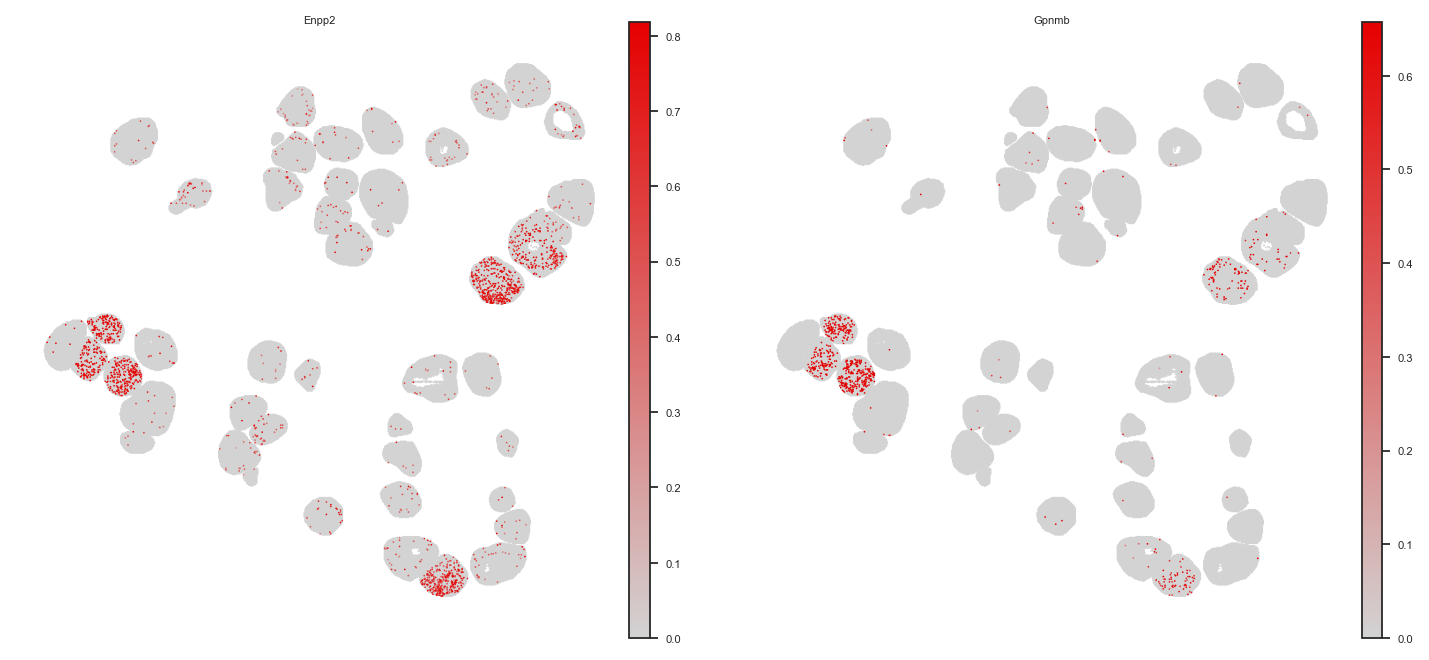

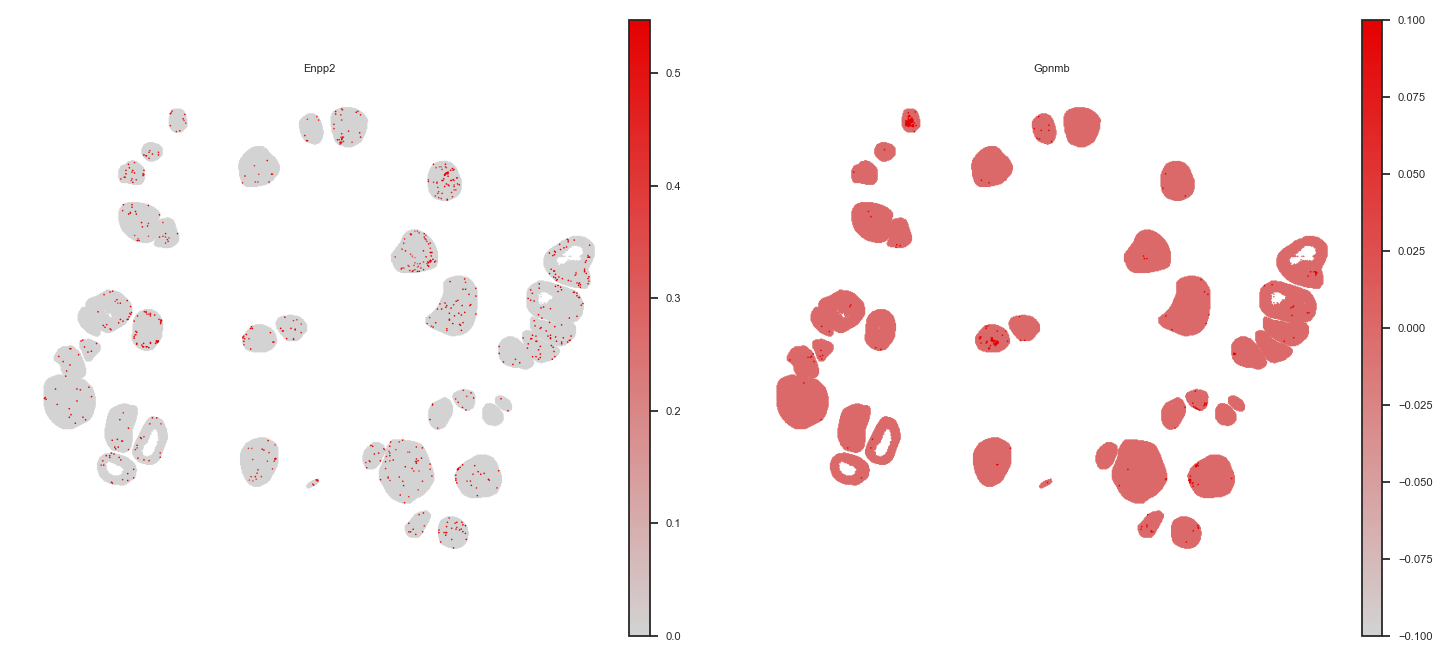

In [114]:
subset = granulosa_combined_subset[granulosa_combined_subset.obs["batch"] == "CTR"]
sc.pl.spatial(subset, color = ["Enpp2", "Gpnmb"], 
              cmap=sns.blend_palette(["lightgray", sns.xkcd_rgb["red"]], 
                                     as_cmap=True), 
              spot_size=30, ncols=2, wspace=0.1, vmin=0, vmax='p99.2')
subset = granulosa_combined_subset[granulosa_combined_subset.obs["batch"] == "AAV"]
sc.pl.spatial(subset, color = ["Enpp2", "Gpnmb"], 
              cmap=sns.blend_palette(["lightgray", sns.xkcd_rgb["red"]], 
                                     as_cmap=True), 
              spot_size=30, ncols=2, wspace=0.1, vmin=0, vmax='p99.2')

In [119]:
freq_table = granulosa_combined.obs.groupby(['batch', 'annotation']).size().reset_index(name='count')
# freq_table = freq_table[~freq_table["Follicle_type"].isin(["Transitioning"])]
freq_table['total_count'] = freq_table.groupby(["batch"])['count'].transform('sum')
freq_table['proportion'] = freq_table['count'] / freq_table['total_count']
freq_table["batch"] = freq_table["batch"].astype("category")
freq_table["batch"] = freq_table["batch"].cat.reorder_categories(["CTR", "AAV"])
# freq_table["Follicle_type"] = freq_table["Follicle_type"].astype("category")
# freq_table["Follicle_type"] = freq_table["Follicle_type"].cat.remove_categories(["Transitioning"])
# freq_table["Follicle_type"] = freq_table["Follicle_type"].cat.reorder_categories(["Preantral", "Antral", "Atretic", "Lytic"])

C:\Users\zyy\AppData\Local\Temp\ipykernel_5208\4114029808.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = granulosa_combined.obs.groupby(['batch', 'annotation']).size().reset_index(name='count')
C:\Users\zyy\AppData\Local\Temp\ipykernel_5208\4114029808.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table['total_count'] = freq_table.groupby(["batch"])['count'].transform('sum')


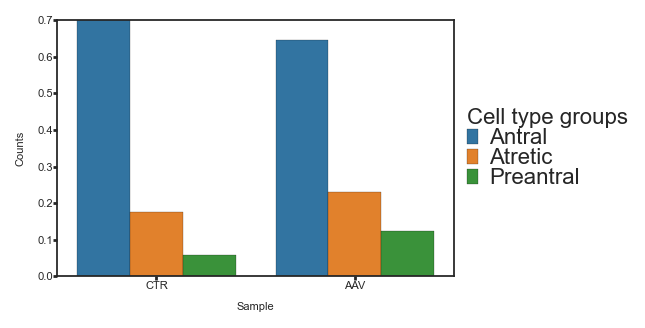

In [150]:

sc.settings.set_figure_params(dpi=80, fontsize=5, facecolor='white', frameon=False, figsize=(5.0, 5.0), vector_friendly = False, transparent=True, format="pdf")
sns.set_style("ticks")
fig, ax = plt.subplots(figsize = (4,2))
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0, size = 2)
sns.barplot(freq_table, y = "proportion", 
            x = "batch", hue="annotation",  dodge=True, palette="tab10", ax=ax, 
           linewidth=0.1, edgecolor="black")
ax.get_legend().remove()
plt.legend(ncol=1, prop={'size': 10}, handletextpad=0.5, markerscale = 0.6, title = "Cell type groups",
           labelspacing = 0.0, frameon = False,  title_fontsize = 10, alignment = "left", loc = 6,
           borderpad = 0.1, borderaxespad = 0.1, bbox_to_anchor = (1.02, 0.5))
plt.rcParams['legend.title_fontsize'] = 10
ax.set_ylim(0,0.7)
ax.set_ylabel("Counts", labelpad = 5)
ax.set_xlabel("Sample", labelpad = 5)
plt.tight_layout()
# plt.savefig("./figures/all_cells_stats_mesenchyme.pdf")

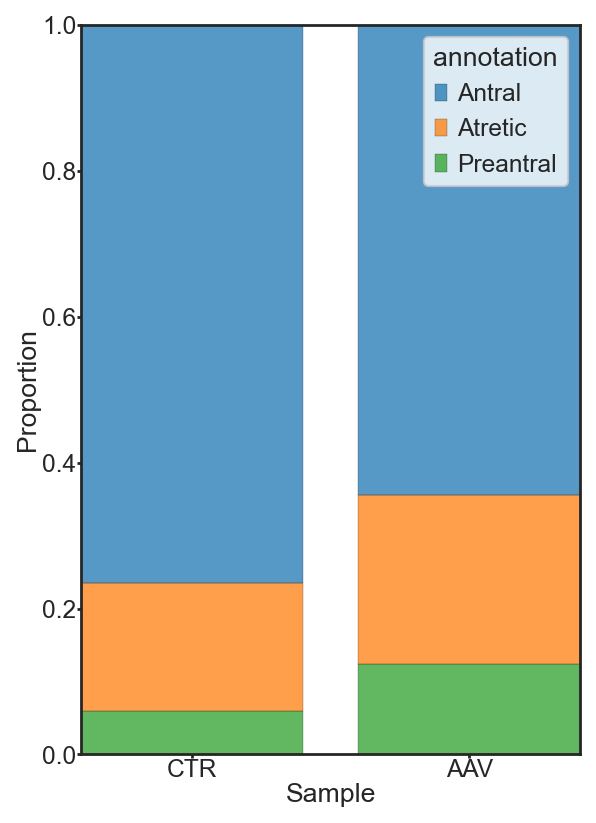

In [155]:
# 设置绘图参数
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(4, 6))
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0, size=2)

# 绘制堆叠的比例图
sns.histplot(
    data=freq_table, 
    x="batch", weights="proportion", hue="annotation", 
    multiple="stack", palette="tab10", shrink=0.8, edgecolor="black", linewidth=0.1, ax=ax
)

# # 设置图例和标签
# handles, labels = ax.get_legend_handles_labels()
# legend = ax.legend(handles, labels, ncol=1, prop={'size': 10}, handletextpad=0.5, markerscale=0.6, title="Cell type groups",
#                    labelspacing=0.0, frameon=True, title_fontsize=7, alignment = "left", loc = 6,
#                    borderpad = 0.1, borderaxespad = 0.1, bbox_to_anchor = (1.02, 0.5))

# # 添加图例边框和背景颜色
# frame = legend.get_frame()
# frame.set_color('lightgrey')  # 设置背景颜色
# frame.set_edgecolor('black')  # 设置边框颜色

# 设置Y轴标签
ax.set_ylabel("Proportion", labelpad=1.0)
ax.set_xlabel("Sample", labelpad=0.5)

# # 使用紧凑布局
# plt.tight_layout()

# 显示图形
plt.show()

In [165]:
from pygam import LinearGAM, s
import numpy as np
import pandas as pd
import time
from collections import OrderedDict
from joblib import delayed, Parallel
from sklearn.preprocessing import StandardScaler
import scanpy as sc
import seaborn as sns

In [169]:
correlation = granulosa_combined_subset[:, ["Enpp2", "Gpnmb"]].X.toarray()

In [170]:
correlation

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)

In [171]:
pd.DataFrame(correlation).corr().iloc[0, 1]

0.06536572509341297

In [172]:
granulosa_combined_subset[:, "Enpp2"].X.mean()

0.015778765

In [175]:
granulosa_combined_subset[:, gene].X.toarray().std()**2

0.00025227822740636965

In [168]:
import scanpy as sc
import pandas as pd

# 计算 `Gpnmb` 基因表达的相关性矩阵
gene_of_interest = "Gpnmb"
correlation_dict = {"gene": [], "correlation": [], "means": [], "dispersions": []}

for gene in granulosa_combined_subset.var_names:
    if gene == gene_of_interest:
        continue
    correlation = granulosa_combined_subset[:, [gene, gene_of_interest]].X.toarray()
    correlation_value = pd.DataFrame(correlation).corr().iloc[0, 1]
    correlation_dict["gene"].append(gene)
    correlation_dict["correlation"].append(correlation_value)
    correlation_dict["means"].append(granulosa_combined_subset[:, gene].X.mean())
    correlation_dict["dispersions"].append((granulosa_combined_subset[:, gene].X.std())**2)

correlation_df = pd.DataFrame(correlation_dict)
correlation_df.set_index("gene", inplace=True)

AttributeError: 'SparseCSRView' object has no attribute 'std'

In [ ]:
# 筛选出相关性大于 0.5 的基因
gpnmb_genes = correlation_df[correlation_df["correlation"] > 0.5]["gene"].values
print(len(gpnmb_genes))

In [ ]:
# 打印特定基因 'Aldh1a1' 的相关性数据
print(correlation_df.loc["Enpp2"])

In [166]:
def plot_gene_expression_trend_clusters(trends, cluster_ids, scale = True):
    if scale: 
        trends_df = pd.DataFrame(
            StandardScaler().fit_transform(trends.T).T,
            index=trends.index,
            columns=trends.columns,
        ).T
    else:
        trends_df = trends.T
    trends_df = trends_df.stack().reset_index().rename(columns = {"level_0": "timepoint", "level_1":"Gene", 0: "Expression"})
    trends_df["Cluster"] = [cluster_ids[x] for x in trends_df["Gene"]]
    return trends_df
def plot_gene_expression_trends(trends, genes, scale = True):
    if scale: 
        trends_df = pd.DataFrame(
            StandardScaler().fit_transform(trends.T).T,
            index=trends.index,
            columns=trends.columns,
        ).T[genes]
    else:
        trends_df = trends.T[genes]
    trends_df = trends_df.stack().reset_index().rename(columns = {"level_0": "timepoint", "level_1":"Gene", 0: "Expression"})
    return trends_df

In [ ]:
trends_df = plot_gene_expression_trend_clusters(trends = trends, cluster_ids=clusters, scale=True)